<h1>Importing Libraries</h1>

In [1]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import joblib
import re

<h1> Loading Data</h1>

In [2]:
#loading data
dir = os.path.join(os.getcwd(), "Emails.tsv") #preparing path for DataSet
EmailsData=pd.read_table(dir,header=None, names=['Type', 'Message'])
EmailsData.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<h2> Data Understanding and Preprocessing</h2>

In [3]:
#display information to ensure that data is complete and dont have any None values
EmailsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Type     5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<AxesSubplot:xlabel='Type', ylabel='count'>

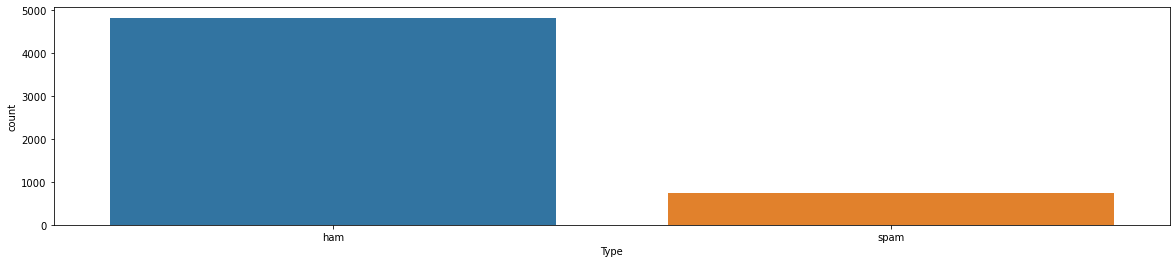

In [4]:
#viewing count of items in classes
plt.figure(figsize=(20,4))
sns.countplot(x="Type",data=EmailsData)

<p>
    from histogram we can see that number of not spam emails is more large than spam's number so our model will be well trained to detect not spam more than spam email
 </p>

In [5]:
# functions for preparing data
def Type(item):#maping type column to 1 for hame and 0 for spa,
    if item=="ham":
        return 1
    else:
        return 0
def Message(item):#deleting any number as it is not relative
    return re.sub(r"[\d]","",item)

In [6]:
# Applying functions for preparing data
EmailsData["Type"]=EmailsData["Type"].apply(Type)
EmailsData["Message"]=EmailsData["Message"].apply(Message)
EmailsData

,Type,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in a wkly comp to win FA Cup final...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the nd time we have tried contact u. ...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [8]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(np.array(EmailsData["Message"]), np.array(EmailsData["Type"]), test_size=0.2,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [9]:
# Making maping from phrase to vactor of numbers for training
Vcreator= CountVectorizer()
Vcreator.fit(X_train)
X_train_vector = Vcreator.transform(X_train).toarray()
X_test_vector=Vcreator.transform(X_test).toarray()
y_test=np.array(y_test).reshape((y_test.shape[0],1))
y_train=np.array(y_train).reshape((y_train.shape[0],1))

In [10]:
X_train_vector.shape

(4457, 6931)

<h1>Creating Neural Network Model</h1>

<pre>
<h3> Neural Network Description </h3>
  1- Don't have any Layer So its not A DNN and that for making learn faster irrespective of making good accuracy 
  2- Have Only One Output as we are Using Binary Classification
  3- It's Weights have been assigned to valuse between 0 and 0.1 which make it Faster 
  4- Have two main function which forward which make forward propagation and back which make backward propagation 
  5- Have another two function one for making prediction and anoter for training
</pre>
<img src="NN.png"/>

In [11]:
class nuralnetwork:
    def __init__(self,x,y):
        self.X=x
        self.Y=y
        self.W1=np.random.rand(x.shape[1],1)/9 #Initallising weights with randome values between 0 and 0.1 for making it faster in training
        self.threshold=0.5 #for threshold
        self.LearningRate=0.001 #for Learning rate
    def sig(self,x):#sigmoid function
        return 1/(1+np.exp(-x))

    def sig_dev(self,x): #derivative of sigmoid function
        return x*(1.0-x)
    def forward (self):#Forward Propagation 
        self.output = self.sig(np.dot(self.X, self.W1))
        return np.vectorize(self.makethreshold)(self.output)
    def back(self):#back propagetion Process for updating weights
        self.o_d2=(self.Y-self.output)
        self.dw1=self.W1+self.LearningRate*np.dot(self.X.T,(self.o_d2*(self.sig_dev(self.output))))
        self.W1=self.dw1
    def train(self,iterations):# Train function 
        for i in range(iterations):
            self.forward()
            self.back()
    def makethreshold(self,item):
        if item > self.threshold:
            return 1
        else:
            return 0
    def predict(self,data):
        self.output = self.sig(np.dot(data, self.W1))
        return  np.vectorize(self.makethreshold)(self.output)


<h1 >Creating Object of Neural Network and Train it</h1>

In [12]:
Train_Accuracy=[]
Test_Accuracy=[]
NN=nuralnetwork(X_train_vector,y_train)
for i in range(100):
    NN.train(10)
    Train_Accuracy.append(accuracy_score(y_train, NN.forward()))
    Test_Accuracy.append(accuracy_score(y_test,NN.predict(X_test_vector)))

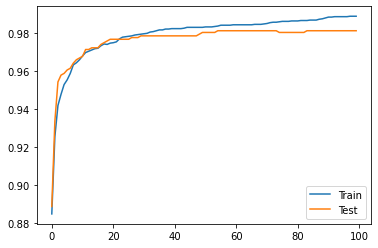

In [13]:
plt.plot(np.linspace(0,99,100),Train_Accuracy,label="Train")
plt.plot(np.linspace(0,99,100),Test_Accuracy,label="Test")
plt.legend()
plt.show()

<h4> No Overfit as Accuracy of Tarin about 98% and in Test 97%</h4>

In [14]:
y_pred=NN.predict(X_test_vector)

In [15]:
metric=confusion_matrix(y_test,y_pred)
print(metric)

[[132  15]
 [  6 962]]


In [16]:
Report=classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       147
           1       0.98      0.99      0.99       968

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



<pre>
From confusion matrix we have to incress precision by changing threshold for making it to become one(100%) as not spam
emails may contains very important one and it's not necessary for seeing spam email
</pre>

In [27]:
NN.threshold=0.25
y_pred=NN.predict(X_test_vector)
metric=confusion_matrix(y_test,y_pred)
print(metric)

[[121  26]
 [  0 968]]


<p>
    Now we can see tht the best threshold is 0.25 for making my model good at detecting all not spam email correctly
</p>

<h1> Saving Model</h1>

In [28]:
#saving Model
joblib.dump(NN , 'mode.sav')

['mode.sav']